<!-- dom:TITLE: The tip of the iceberg or Automatic for the people -->
# The tip of the iceberg or Automatic for the people
**MOD510: Mandatory project 1**  
**Deadline: 16. September 2024 (23:59)**

Date: **Sept. 4, 2024**

**Learning objectives.**
By completing this project, the student will:
* Get experience in structuring and writing a report.

* Write new functions and classes in Python.

* Explore numerical round-off and truncation errors.

* Be introduced to useful Python libraries for scientific computing.

**Abstract.** Because computers have finite memory, numerical errors must always
be taken into account when doing calculations, especially when
working with floating-point numbers [[Goldberg, 1991]](#goldberg1991every).
In the first parts of this project we investigate round-off errors and
truncation errors using the Python programming language, and we
discuss how different implementation strategies affect code
efficiency and code clarity. In particular, we show how coding with
classes can simplify the implementation of numerical algorithms.
Finally, you can choose *one* of the following two topics: i) use the power of available Python libraries to quickly visualize and manipulate large data sets. To this end, we
look at how ice melting in Antarctica could affect
sea level rise [[Fretwell et al., 2013]](#fretwell2013bedmap2), ii) automatic differentiation [[Wengert, 1964]](#wengert1964simple) to illustrate the power of object oriented programming. Automatic differentiation is a cornerstone in training neural networks and in many commercial simulation codes.

Remember to take a look in the Appendix for some tips, and read the guidelines for project submission at the end!

In [ ]:
#Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import rockhound as rh
import cmocean

<!-- ======= Introduction   ======= -->



# Exercise 1: Finite-precision arithmetic
<div id="ex:round_err"></div>

**Part 1.**

Run the following code snippet:

In [1]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

* Explain the meaning of the numbers that are printed out.

Hint: Read the lecture material on the IEEE Standard for floating-point arithmetic.

sys.float_inf describes the float representation in the system based on IEEE 754-1985 standard.


|    Parameter    |    Description    |
|:---------------|:------------------|
| **max**         | Highest positive finite number that can be represented by the system        |
| **max_exp**     | Maximum exponent in binary basis that can be represented by the system      |
| **max_10_exp**  | Maximum exponent in 10-digit basis that can be represented by the system    |
| **min_exp**     | Minimum exponent in binary basis that can be represented by the system      |
| **min_10_exp**  | Minimum exponent in 10-digit basis that can be represented by the system    |
| **dig**         | Maximum number of decimal digits that can be represented                    |
| **mant_dig**    | Mantissa digit, or the float precision                                      |
| **epsilon**     | Least value, so that $1.0 + \epsilon$ is not representable as a float 1.0   |
| **radix**       | The radix of exponent representation                                        |
| **rounds**      | Integer that represents the rounding mode for float, rounds=1 means that <br> the rounding-off for the float in the system is "to the nearest" |



**Part 2.**

* Show how you can calculate the printed-out values `max`, `min`, `epsilon` yourself (again, based on the IEEE standard).

Based on IEEE754-1985 standard, float representation in 64-bits system is consist of 1 bit for signs, 11 bits for exponent, and 52 bits for fraction. The exponent can be positive to represent value greater than 1 or negative to represent value less than 1. It is written as +-q2^{E-e}. The number of bias, e, is fixed, in 64-bits system e = 1023.
The value of exponent is represented by 11 bits so it can take value from 0 to $\(2^{11}\)-1=2047. E=0 and E=2047 is reserved for special number which are negative infinity and infinity respectively.

**Calculate max**
The maximum value is when all the bits in Fraction is 1, so that
1.1111 (48 more ones) . 2^{1023} = 

**Calculate min**
1.

**Calculate epsilon**

**Part 3.**

In Python, typing `0.1+0.2` does not (typically) produce the same output as `0.3`.

* Why not?

Because the computer can not represent float 0.2 exactly. Rather it represent something close to 0.2. Hence, 0.1+0.2 is not the same as 0.3.

**Part 4.**

* Would you use the `==`-operator to test whether two floating-point numbers are equal?

No, because of the floating point representation. 

* Why / why not? Can you think of alternative ways to do floating-point number comparison?






# Exercise 2: Get up to speed with NumPy
<div id="exer:numpy"></div>

The purpose of this exercise is to learn a little bit about
[NumPy](https://numpy.org/), which is an incredibly useful Python library.
A major reason for its popularity is efficiency: doing computations with NumPy
arrays (objects of the type `ndarray`) instead of using native Python lists (vanilla Python) can,
by itself, speed up a program by several orders of magnitude!
The mechanism for speed-up is [vectorized computation](https://www.oreilly.com/library/view/python-for-data/9781449323592/ch04.html).

**Vectorized functions.**

Using NumPy arrays allows you to create vectorized functions; functions that
operate on a whole array at once, rather than looping over the elements
one-by-one inside a custom written loop.

The way vectorization works behind the scenes is still via loops
(optimized, pre-compiled C code), but as Python programmer you do not need
to worry about the details.



**Part 1.**

The following code block gives an example of a vectorized function:

In [3]:
import numpy as np

x = np.linspace(0, 1, 10)
np.exp(x)  # Apply f(t)=exp(t) to each element in the array x.
np.exp(-x)  # Apply the function f(t)=exp(-t) to each element of x.

array([1.        , 0.89483932, 0.8007374 , 0.71653131, 0.64118039,
       0.57375342, 0.51341712, 0.45942582, 0.41111229, 0.36787944])

Notice the usage of `np.exp` instead of using the exponential function provided
in the built-in [math](https://docs.python.org/3/library/math.html)
library; this is an example of a
[universal function](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).

* Create a native Python list of the same size as `x` and holding the same values. Apply the same two function calls to this list, i.e. `np.exp(x)` and `np.exp(-x)`. Explain what happens.

* How would you generally evaluate a function on all elements of a native Python list? (as opposed to a NumPy array)

**Part 2.**

As already hinted at, the NumPy library comes with a plethora of useful
features and functions. The code snippets below show some examples:

In [5]:
np.zeros(20)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [6]:
np.ones(20)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

In [7]:
np.linspace(0, 10, 11)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [8]:
np.linspace(0, 10, 11, endpoint=False)

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

In [9]:
vector = np.arange(5) + 1
2*vector

array([ 2,  4,  6,  8, 10])

* Explain what each line of code does.

* How would you produce the same output using native Python lists?

**Part 3.**

Frequently you will want to extract a subset of values from an array based
on some kind of criterion. For example, you might want to count the number
of non-zero numbers, or identify all values exceeding a certain threshold.
With NumPy, suchs tasks are easily achieved using
[boolean masking](https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html), e.g.:

In [10]:
array_of_numbers = np.array([4, 8, 15, 16, 23, 42,0,5])
nnz = np.count_nonzero(array_of_numbers)
print(f'There are {nnz} non-zero numbers in the array.')
is_even = (array_of_numbers % 2 == 0)
is_greater_than_17 = (array_of_numbers > 17)
is_even_and_greater_than_17 = is_even & is_greater_than_17

There are 7 non-zero numbers in the array.


However, neither of the following codes lines will execute:

In [ ]:
is_even_and_greater_than_17 = is_even and is_greater_than_17
print(array_of_numbers % 2 == 0 & array_of_numbers > 17)

* Explain why this code fails.

* Use [`np.logical_and`](https://numpy.org/doc/stable/reference/generated/numpy.logical_and.html) to make the code work 


**Part 4.**

The function [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html)
can also be used to select elements from an array.

* Explain the output of the following two lines of code:

In [ ]:
np.where(array_of_numbers > 17)[0]

In [ ]:
np.where(array_of_numbers > 17, 1, 0)

# Exercise 3, Part I: Finite Differences (FD) with Functions

In scientific computing one often needs to calculate derivatives of functions.
For problems encountered in practice, exact formulas may not be available,
in which case numerical estimates are needed. However, to evaluate the
correctness of our programmed numerical methods, it is still a very good idea
to test the code on simple functions where the derivative is known.

In this exercise, we consider a function that is relevant for describing wave
phenomena:

$$f(x) = \sin(bx)\cdot e^{-ax^2}\hspace{35pt}\text{(1)}$$

One way to implement the [function in Python](https://realpython.com/defining-your-own-python-function/) is:

In [1]:
def f(x, a=0.1, b=10):
    return np.sin(b*x)*np.exp(-a*x*x)

We have chosen to define `a` and `b` as *default arguments*, which allows us to evaluate the function at $x=1$ by simply typing `f(1)`;
this is equivalent to the command `f(1, 0.1, 10)`. If you want to change the `b` parameter, you can do, e.g., `f(1, b=2)`.
Note also that the function works both when `x` is a single number *and* when it is a Numpy array. This is because we use the Numpy versions of the sine (`np.sin`) and exponential (`np.exp`) functions.

**Python functions are first-class!**

An important feature of Python is that functions are
[first-class objects](https://en.wikipedia.org/wiki/First-class_function),
meaning that you can assign them to variables, you can store them inside
various containers and data structures, they can be passed as input arguments
to other functions, and they may be return values of other functions.



We will exploit this property of Python several times during this project.

**Part 1.**

It is always a good idea to start by visualizing the function in a plot.

* Make a Python function that plots $f(x)$ from equation ([1](#eq:p1:f)) over an arbitrary closed interval.

* Use the function to plot $f(x)$ in the range $[-10,10]$. Try to make your figure similar to the one shown in [figure 1](#fig:p1:wave)

<!-- dom:FIGURE: [fig-project1/wave.png, frac=1.0] A plot of $f(x)$. <div id="fig:p1:wave"></div> -->
<!-- begin figure -->
<div id="fig:p1:wave"></div>

<img src="./fig-project1/wave.png" ><p style="font-size: 0.9em"><i>Figure 1: A plot of $f(x)$.</i></p>
<!-- end figure -->


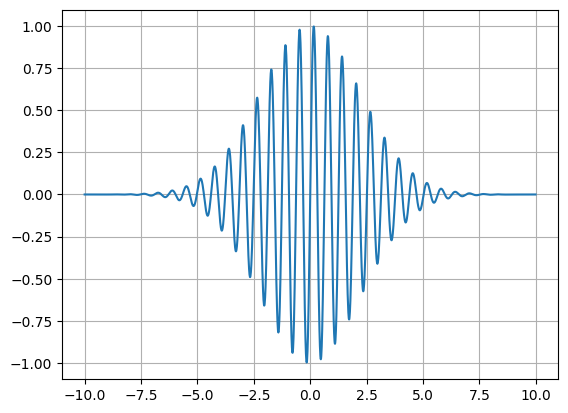

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_f(function, min, max, h=0.01):
    """Plot the function f in the interval [min, max]."""
    x = np.arange(min, max, h)
    y = function(x)
    fig = plt.figure()
    plt.plot(x, y)
    plt.grid()

plot_f(f, -10, 10)
    


**Part 2.**

The analytical derivative of $f(x)$ is

$$f^\prime(x) =b \cos(bx)\cdot e^{-ax^2} - 2ax\sin(bx)\cdot e^{-ax^2}\hspace{35pt}\text{(2)}$$

* Write a Python function that calculates the derivative defined in equation ([2](#eq:p1:ana)) (*not* the numerical derivative)


In [3]:
def analytical_derivative(x, a=0.1, b=10):
    return (b*np.cos(b*x) - 2*a*x*np.sin(b*x))*np.exp(-a*x*x)

**Part 3.**

Next, you are going to write a Python function that calculates the numerical
derivative of an *arbitrary* single-variable function `f` at a point $x$
using finite differences.

* Write a Python function that calculates the derivative of an arbitrary function using the *forward difference* method (see section 3.3 in [[Hiorth, 2024]](#hiorth) ).

* Apply your function to the particular case of equation ([1](#eq:p1:f)) and $x=1$. Use a suitable value of $h$, e.g. $h=1e-2$, and check that your estimate agrees reasonably well with the *analytical solution*.

Hint: Check out some tips in Appendix A, we would recommend to use the [args](https://realpython.com/python-kwargs-and-args/) possibility in Python to write a numerical derivative function. See also section 1.3.4 in [[Hiorth, 2024]](#hiorth).


In [4]:
def forward_difference(func, x, h=1E-2, *args):
    return (func(x + h) - func(x))/h

numerical_resutl = forward_difference(f, 1)
analytical_result = analytical_derivative(1)
print(f'Numerical result: {numerical_resutl}')
print(f'Analytical result: {analytical_result}')


Numerical result: -7.220096595246589
Analytical result: -7.493783027703379


It is shown from the code in the cell aboce that the numerical derivative of the function $f(x)$ at $x=1$ is $-7.220096$ and the analytical derivative is $-7.493783$. As the error is $0.273687$, the numerical derivative is in good agreement with the analytical solution.

**Part 4.**

* Write another Python function that calculates $f^{\prime}(x)$ with the *central difference* method (see section 3.4 in [[Hiorth, 2024]](#hiorth)).


In [5]:
def central_difference(func, x, h=1E-2, *args):
    return (func(x + h) - func(x - h))*0.5/h

In [6]:
#CHECK CODE, TO BE DELETED
print(f'Analytical result: {analytical_result}')
print(f'Numerical result: {numerical_resutl}')
print(f'Central difference result: {central_difference(f, 1)}')
print(numerical_resutl-analytical_result)
print(central_difference(f, 1)-analytical_result)

Analytical result: -7.493783027703379
Numerical result: -7.220096595246589
Central difference result: -7.481567749530806
0.27368643245679003
0.012215278172572397


**Part 5.**

Next, we wish to quantify the error in our numerical derivative approximations for the point $x=1$.

* For each of the two derivative approximations to $f^{\prime}(1)$ (forward difference and central difference), make a scatter plot that shows the *absolute error* of the approximation on the $y$-axis versus the step size, $h$, on the $x$-axis. Include both error curves in the same figure. The step sizes should be varied logarithmically between $h=10^{-16}$ and $h=10^0=1$.

* Comment on what you observe in the figure you made. When is the numerical error smallest, and why? Is it what you expect from a theoretical analysis using Taylor's formula?


Text(0, 0.5, 'Numerical Error')

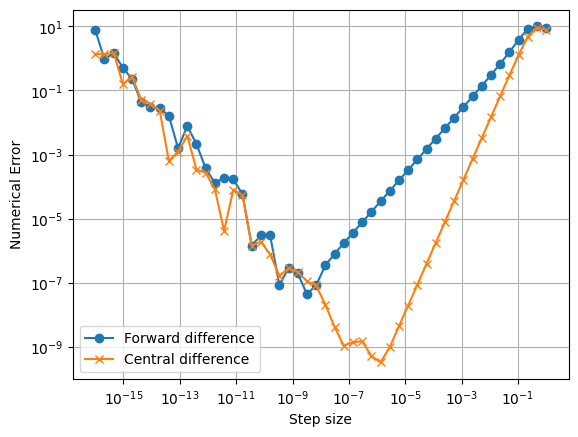

In [7]:
fig = plt.figure()
step = np.logspace(-16, 0, 50)
x = 1
error_forward = [abs(forward_difference(f, x, h) - analytical_derivative(x)) for h in step]
error_central = [abs(central_difference(f, x, h) - analytical_derivative(x)) for h in step]
plt.plot(step, error_forward, '-o', label='Forward difference')
plt.plot(step, error_central, '-x', label='Central difference')

plt.grid()
plt.legend(loc='best')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Step size')
plt.ylabel('Numerical Error')



In [8]:
#return the step size that make the error smallest based on numerical calculation
print(f'Step size that make the error smallest is: {step[error_forward.index(min(error_forward))]}, which makes the error: {min(error_forward)}')   
print(f'Step size that make the error smallest for central difference method is {step[error_central.index(min(error_central))]}, which makes the error: {min(error_central)}')



Step size that make the error smallest is: 3.23745754281764e-09, which makes the error: 4.470101355735778e-08
Step size that make the error smallest for central difference method is 1.3257113655901055e-06, which makes the error: 3.326467989950288e-10


Numerical error is a sum of truncation error and round-off error, while truncation error is proportional to $h$, round-off error is inversely proportional to $h$. Theoritical analysis using Taylor's formula for forward difference and central difference shown in equations below. 



**Forward Difference**  
The total error of the forward difference method is given by: 

\begin{equation*}
R_1 = \frac{h}{2} |f''(\eta)| + \frac{2 \epsilon |f(x)|}{h}
\end{equation*}
The step size that minimizes the total error is known by differentiating the $R_1$ with respect to $h$ and put it equal to zero. The optimal step size is given by:

\begin{equation*}
h = 2 \sqrt{\epsilon |\frac{f(x)}{f''(\eta)}|} 
\end{equation*}
The approximation value of $f(1)$ and $f''(1)$ is $-0.49$ and $52.34$ respectively. By inserting those values into the equation above, the optimal step size is $9.68 \cdot 10^{-10}$.

**Central Difference**  
The total error of the central difference method is given by:

\begin{equation*}
R_2 = \frac{h^2}{6} |f'''(\eta)| + \frac{2 \epsilon |f(x)|}{h}
\end{equation*}
By doing the same procedure as above, the optimal step size is given by:
\begin{equation*}
h = \sqrt[3]{6 \epsilon |\frac{f(x)}{f'''(\eta)}|} 
\end{equation*}
By using the approximation value of $f(1)$ and $f'''(1)$, which are $-0.49$ and $733.28$ the optimal step size is $7.37 \cdot 10^{-7}$.

Based on the scatter plot above, the numerical error is the smallest when step size, h, is around $10^{-9}$ for approximation using forward difference and $10^{-7}$ for central difference which is consistent with the theoretical analysis using Taylor's formula.







# Exercise 3, Part II: FD with Classes
<div id="exer:fd_classes"></div>

Implementing numerical algorithms with free functions, as we did in the
previous exercise, is perfectly fine, and you can complete the course by only
coding in this way. However, experience has taught us that it is easy to
introduce unnecessary errors when using this approach. In many cases you
are better off by also using classes, and maybe [object-oriented design](https://realpython.com/python3-object-oriented-programming/).
In this exercise, you will get some practice in coding with classes.
This knowledge will come in handy in later projects, and in any case
it is a good tool to have in your programming toolkit.

Previously, we worked with a function having two input parameters, $a$ and $b$.
Implementing numerical algorithms using free functions was then simple.
However, in a more complicated situation there
could be dozens, or even hundreds, of parameters to keep track of.
Most of these parameters might have fixed values, but frequently you will
want to re-run a model with slightly different parameters than before.
If you are not using classes, it is very easy to use the wrong parameters.
This is especially true when working in a Jupyter notebook, because then it is
possible to run code blocks in any order. If you forget to excute a cell that is
responsible for updating one of your variables, your subsequent calculations
might use incorrect input, and thus end up being wrong!

**Key take-away: Classes provide encapsulation.**

By wrapping parts of your code into classes, and particular realizations of
classes (objects), you facilitate code re-use, and it can make your code
easier to understand and work with, thus reducing the probability of
introducing bugs which may be hard to track down.



## A Crash Course on Classes
<div id="exer:crash_course"></div>

To get started, there are really only a couple of things you need to know.
First, all of your classes should include a special function called `__init__`,
in which you declare the variables (attributes) you wish an instance / object
of the class to keep track of.

Second, when setting, updating, or fetching attributes stored within the class,
you should always use the prefix `self`, followed by a dot.
Furthermore, the functions you define inside the class should have `self` as
the first function argument ([there are exceptions](https://realpython.com/python3-object-oriented-programming/),
but we will not consider that in this project).
All of this is best understood via an example:

In [9]:
class WavePacket:
    """
    A class representation of a wave packet-function.
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def f(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)

    def plot(self, x_min=-10, x_max=10, dx=0.01):
        """
        A simple plotting routine for plotting f(x) in some range.
        """
        x = np.arange(x_min, x_max, dx)
        y = self.f(x)
        fig = plt.figure()
        plt.plot(x, y)
        plt.grid()

Besides the initialization method and a function that calculates $f(x)$ from
equation ([1](#eq:p1:f)), the class includes a simple plotting routine.
A major difference from before is the following: when our function $f(x)$
is defined inside a class, we do not have to pass around $a$ and $b$ as
arguments to the function `f`. Instead, we simply access $a$ and $b$ from
inside the class itself (using the `self`-prefix).
<!--  -->
<!-- both when referring to the variables / attributes, and as the first input -->
<!-- argument to the function. -->

Below is an example of how to use the class:

0.8227663359156917
-0.49225065733419177


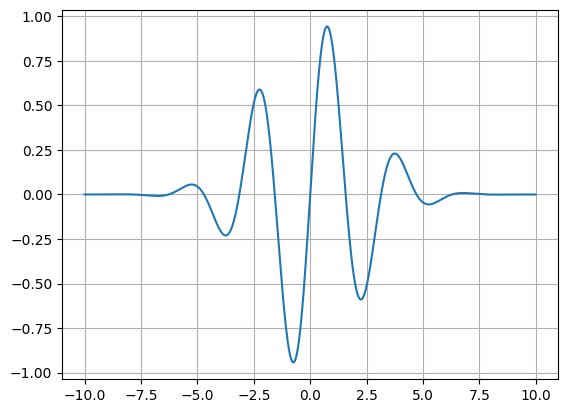

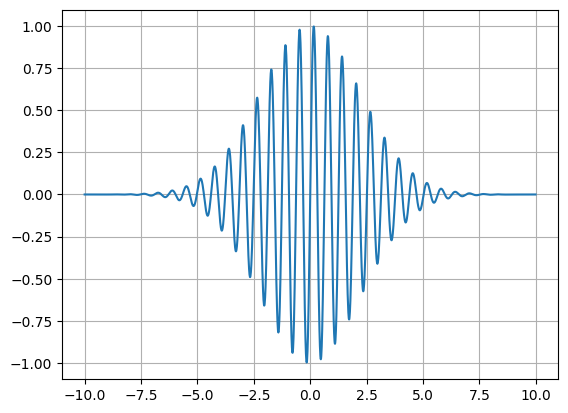

In [10]:
# Create two WavePacket objects, having their own parameter values
WP1 = WavePacket(0.1, 2)  # a=0.1, b=2
WP2 = WavePacket(0.1, 10)  # a = 0.1, b=10

# Evaluate the two functions at a specific point
x = 1
print(WP1.f(x))
print(WP2.f(x))

# Plot the two functions
WP1.plot()
WP2.plot()

Although we had to write slightly more code, we hope you appreciate
how easy this makes running parallel simulations with different parameters.
Actually, Python provides a way for us to simplify even further, by
defining the special [`__call__`](https://www.realpythonproject.com/python-magic-oop-dunder/)  method for the class:

In [11]:
class FancyWavePacket:
    """
    A slightly more fancy class representation of a wave packet-function.

    In this version, we define the dunder (double-underscore) method __call__,
    which lets us treat objects of the class as if they were real functions!
    """
    def __init__(self, a, b):
        self.a = a
        self.b = b

    def __call__(self, x):
        return np.sin(self.b*x)*np.exp(-self.a*x*x)
    
    def analytical_derivative(self, x):
        """Calculate the analytical derivative of f at x."""
        return (self.b*np.cos(self.b*x) - 2*self.a*x*np.sin(self.b*x))*np.exp(-self.a*x*x)
    
    def forward_difference(self, x, h):
        """Return the forward difference approximation of the derivative of f at x."""
        return (self(x + h) - self(x))/h
    
    def central_difference(self, x, h):
        """Return the central difference approximation of the derivative of f at x."""
        return (self(x + h) - self(x - h))*0.5/h
    
    def plot(self, x, *args):
        """
        Scater plot of the numerical error of the forward and central difference
        """
        fig = plt.figure()
        step = np.logspace(-16, 0, 10)
        plt.plot(step, [abs(self.forward_difference(x, h) - self.analytical_derivative(x)) for h in step], '-o', label='Forward difference')
        plt.plot(step, [abs(self.central_difference(x, h) - self.analytical_derivative(x)) for h in step], '-x', label='Central difference')

        
        plt.grid()
        plt.legend(loc='best')
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Step size')
        plt.ylabel('Numerical Error')
        plt.show()



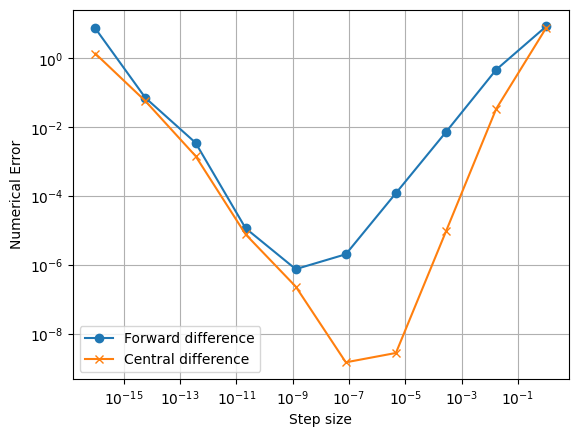

In [12]:
Wave1 = FancyWavePacket(0.1, 10)
Wave1.plot(x=1)

In [13]:
#CHECK CODE, TO BE DELETED
print(f"Forward difference: {Wave1.forward_difference(1, 1E-2)}")
print(f"Central difference: {Wave1.central_difference(1, 1E-2)}")
print(f"Analytical derivative: {Wave1.analytical_derivative(1)}")

Forward difference: -7.220096595246589
Central difference: -7.481567749530806
Analytical derivative: -7.493783027703379


Compared to the first example of the class, observe that we have replaced the
function `f` by `__call__` (with two underscores on both sides of "call").
This way, we we can write our code *as if FancyWavePacket was a function*:

In [14]:
WP1 = FancyWavePacket(0.1, 2)  # a=0.1, b=2
WP2 = FancyWavePacket(0.1, 10)  # a = 0.1, b=10

# Evaluate the two functions at a specific point
x = 1
print(WP1(x))  # If WP1 had been a function, the syntax would be the same here!
print(WP2(x))  # Again, we no longer have to type "WP2.f(x)", we can do "WP2(x)".


0.8227663359156917
-0.49225065733419177


**READ THIS BEFORE ANSWERING THE EXERCISES BELOW.**

To avoid code duplication, you should only submit a single version of the
WavePacket class. In other words, while different exercises will ask you to add
a new function to the class, your final delivery should only include the full
class which contains all of the functions.



**Part 1.**

* Add a function ([instance method](https://realpython.com/instance-class-and-static-methods-demystified/)) to the class that returns the forward difference approximation to the derivative of the function `f` at a point `x`. Include both `x` and the step-size `h` as input arguments to the function.

* Add another second function which calculates the central difference approximation.



**Part 2.**

* Make a third class function that, for any input $x$, creates scatter plots showing the absolute error of the two finite difference approximations of $f^{\prime}(x)$ versus step size. As before, choose step sizes in the range from $10^{-16}$ to 1 (with logarithmic spacing). 
TBC: **Is absolute error meant is the difference between the approximation to the analytical solution?**

Hint: You should re-use the first two functions when making the third one.

# Exercise 4: A song of ice and fire?
<div id="exer:isostasy"></div>
* NB! Choose this Exercise **or** Exercise 5

There is currently a great deal of concern about global warming.
Some critical issues are whether we are more likely to observe
extreme local temperatures, increased frequencies of natural
disasters like forest fires and droughts, and if there are
"tipping points" in the climate system that are, at least on the
human timescale, irreversible [[IPCC, 2021]](#IPCC2021).
One particular question to ask is: How much ice is likely to melt?
And, what would be the consequence of ice melting for sea level rise (SLR)?

Since most of the ice on Planet Earth is located in Antarctica, substantial
effort has been spent in mapping the ice and the bedrock of this continent.
Most of the data is freely available, and we can use them to investigate
different scenarios.

**READ THIS BEFORE YOU START THIS EXERCISE.**


In the last part of this project you are going to work with ice data
from the *bedmap2* dataset [[Fretwell et al., 2013]](#fretwell2013bedmap2)
The [rockhound](https://github.com/fatiando/rockhound)
library can be used to load the data.
As an aid to plotting, you might also want to use color maps from the
[cmocean](https://pypi.org/project/cmocean/) package [[Thyng et al., 2016]](#thyng2016true). To install bedmap2 data you have to create a new conda environment (called project1)

In [ ]:
#conda config --add channels conda-forge
conda create -n project1 python matplotlib numpy scipy
    xarray==0.19.0 pandas rockhound cmocean pip jupyter

See Appendix B for some additional information. After the new environment is created you may run

In [ ]:
conda activate exercise4
jupyter notebook

## Theory

To calculate SLR, we need to know not only how thick the ice is, but also
its elevation above the bedrock. In this exercise you will see how we can
use Python, together with available data and libraries, to do quite advanced
calculations.

### Melting of an iceberg

Let us start by deriving a result that you may have seen before.
We shall consider an iceberg that is floating and which is not impacted
by any other forces than gravity.
The total volume of ice
in [figure 2](#fig:iceberg) is $V_f + V_\text{H2O}^\text{disp}$ ,
where $V_f$ is the ice volume floating above the sea,
and $V_\text{H2O}^\text{disp}$ is the
volume of displaced sea water (submerged ice).
According to Newton's 2nd law, the total weight of ice is therefore

$$W=m_{ice}g = \rho_{ice}V_{ice}g
= \rho_{ice}(V_f + V_{\text{H$_2$O}}^\text{disp})g\hspace{35pt}\text{(3)}$$

where $\rho_{ice}$ is the density (mass divided by volume),
and $g=9.81$ $\mathrm{m/s^2}$ the gravitational constant.
On the other hand, the Archimedean principle tells us that buoyancy
is proportional to *the mass of displaced water*, hence another expression
for the same weight is

$$W = \rho_{w}V_{\text{H$_2$O}}^\text{disp}g\hspace{35pt}\text{(4)}$$

where $\rho_{w}$ is the density of the surrounding sea-water.
As the ice melts, it must be turned into an equal mass of liquid ice-water:

$$
m_\text{ice} = m_\text{ice water} \nonumber
$$

$$\rho_\text{ice}V_\text{ice} = \rho_\text{ice water}V_\text{ice water}\hspace{35pt}\text{(5)}$$

By combining the above equations, we therefore get:

$$V_{\text{H$_2$O}}^\text{disp}=\frac{\rho_\text{ice water}}{\rho_{w}}V_\text{ice water}\hspace{35pt}\text{(6)}$$

Therefore, the net contribution to SLR is captured by the volume change

$$\Delta{V}\equiv V_\text{ice water}-V_{\text{H$_2$O}}^\text{disp}=
\left(1-\frac{\rho_\text{ice water}}{\rho_{w}}\right)V_\text{ice water}\hspace{35pt}\text{(7)}$$

If the melted ice has the same density as seawater, it follows that there
is *no increase in sea level*. On the other hand, if the density is
lower than that of seawater, there is a contribution.
Typically, the melting of ice dilutes the salinity of the ocean, which
leads to a small increase in sea level [[noerdlinger2007melting]](#noerdlinger2007melting).

<!-- dom:FIGURE: [fig-project1/iceberg.png, width=800 frac=1.0] A schematic illustration of an iceberg. $V_{\mathrm{H_{2}O}}^{\mathrm{disp}}$ is the volume of water displaced by the iceberg. <div id="fig:iceberg"></div> -->
<!-- begin figure -->
<div id="fig:iceberg"></div>

<img src="./fig-project1/iceberg.png" width=800><p style="font-size: 0.9em"><i>Figure 2: A schematic illustration of an iceberg. $V_{\mathrm{H_{2}O}}^{\mathrm{disp}}$ is the volume of water displaced by the iceberg.</i></p>
<!-- end figure -->

### Freeboard

The vast majority of ice in Antarctica is not freely floating.
In addition to the salinity effect described above, the main contribution
to SLR is from ice located above *hydrostatic equilibrium*.
It is useful to introduce the concept of the *freeboard*, which is the
height above seawater of a floating iceberg.
Again referring to [figure 2](#fig:iceberg), the freeboard height, $h$, is

$$h=\left(\frac{\rho_w}{\rho_\text{ice}}-1\right)h_w\hspace{35pt}\text{(8)}$$

For the *bedmap2* dataset, the freeboard level can be computed
from ([figure 3](#fig:bedmap2_ice_thickness))

$$h = -(\text{surface}-\text{thickness})\cdot\left(\frac{\rho_w}{\rho_{ice}}-1\right)\hspace{35pt}\text{(9)}$$

Note that this formula assumes
that the bedrock is below sea-level.

**Part 1.**

The code below is taken from the
[rockound library documentation](https://www.fatiando.org/rockhound/latest/api/generated/rockhound.fetch_bedmap2.html):

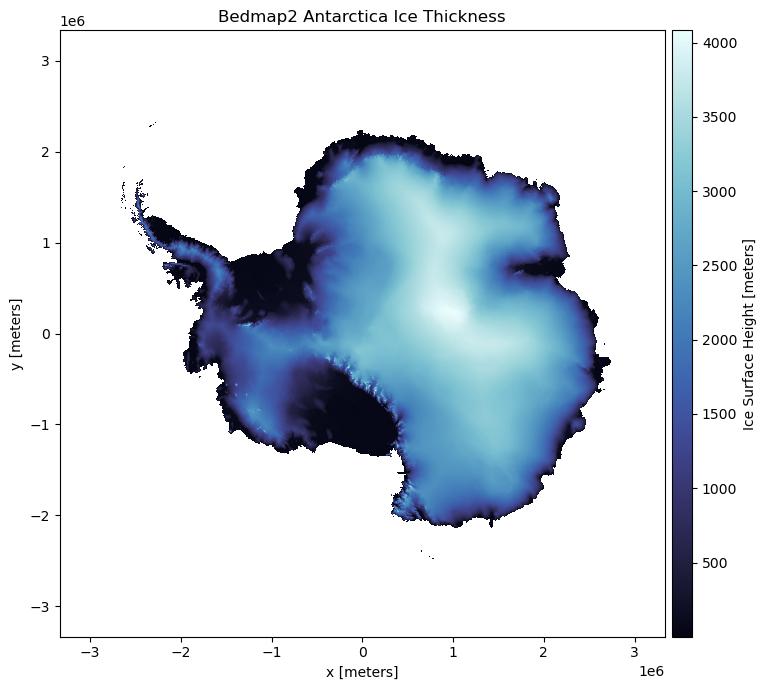

In [4]:
import rockhound as rh
#plt to be deleted
import matplotlib.pyplot as plt
import cmocean
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface","bed"])
plt.figure(figsize=(8, 7))
ax = plt.subplot(111)
bedmap.surface.plot.pcolormesh(ax=ax,cmap=cmocean.cm.ice,
                       cbar_kwargs=dict(pad=0.01, aspect=30))
plt.title("Bedmap2 Antarctica Ice Thickness")
plt.tight_layout()
plt.show()

* Run the code and reproduce [figure 3](#fig:bedmap2_ice_thickness).

<!-- dom:FIGURE: [fig-project1/bedmap2_plot.png, width=800 frac=1.0] Visualization of the ice thickness in Antarctica. <div id="fig:bedmap2_ice_thickness"></div> -->
<!-- begin figure -->
<div id="bedmap2_ice_thickness"></div>

<img src="./fig-project1/bedmap2_plot.png" width=800><p style="font-size: 0.9em"><i>Figure 3: Visualization of the ice thickness in Antarctica.</i></p>
<!-- end figure -->

This may take quite some time, so it is recommended that you do not execute
the cell generating the plot more often than you have to.

**Part 2.**

The Thwaites glacier, named after Fredrik T. Thwaites, is of particular
interest. Also referred to as the Doomsday glacier, it is a fast moving
glacier (up to 4 km/year) at the coast of Antarctica, roughly 120 km wide.
It is called the Doomsday glacier because it is believed that it may trigger
a [collapse of west Antarctica](https://interactive.pri.org/2019/05/antarctica/doomed-glacier-race.html).
We can use the bedmap2 dataset to view a cross section of the glacier,
$y = -0.5\cdot10^{6}$ and $x\in[-1.6\cdot10^6,-1.35\cdot 10^6]$:

In [5]:
# Extract cross section using the original coordinates
bed1d = bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))

# Add a second x-coordinate to make prettier plots
# (shift x-axis to start at zero, and convert from m to km)
bed1d = bed1d.assign_coords({"x2":((bed1d.x+1.6e6)/1e3)})

It is now possible to plot the values in the `bed1d` data array by simply
typing

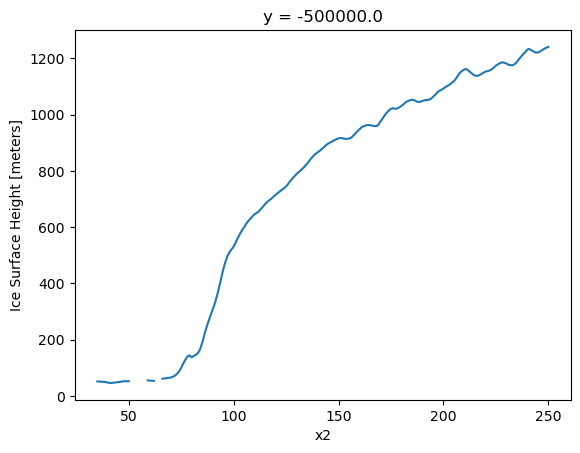

In [7]:
surface_elevation_values = bed1d.surface.plot(x='x2')

**A note concerning the xarray library.**

The *bedmap2* data is stored in data structures provided by the
[xarray](http://xarray.pydata.org/en/stable/) package, which is built on
top of [NumPy](https://numpy.org) and [pandas](https://pandas.pydata.org).
While xarray allows you to apply plot commands directly to
[Datasets](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html#xarray.Dataset)
and [DataArrays](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html#xarray.DataArray),
it might be easier to use the `matplotlib.pyplot` module manually.
To this end, you might also want to extract the underlying NumPy arrays
containing the data you are interested in. This can easily be done as in
the following example: `surface_elevation_values = bed1d['surface'].values`.



* Use equation ([9](#eq:freeboard_level)) to calculate the freeboard level. For the ice use a density of $917\; kg/m^3$ and for sea-water use a density of $1030\; kg/m^3$.

* Make a cross section plot of the ice thickness, bed rock, and freeboard level, similar to (the right) figure ([fig:cross](#fig:cross))

* Explain what you see. Is the shape of the bedrock important for sea level rise?

<!-- dom:FIGURE: [fig-project1/free_cross.png, width=800 frac=1.0] (left) How to calculate the freeboard level. (right) Cross section plot of Thwaites glacier. <div id="fig:cross"></div> -->
<!-- begin figure -->
<div id="fig:cross"></div>

<img src="./fig-project1/free_cross.png" width=800><p style="font-size: 0.9em"><i>Figure 4: (left) How to calculate the freeboard level. (right) Cross section plot of Thwaites glacier.</i></p>
<!-- end figure -->

In [ ]:
freeboard_values =-(bedmap.surface - bedmap.thickness) * ((917/1030)-1)

**Part 3.**

* Use the whole data set to estimate the total SLR if all the ice of Antarctica melts.

Hints to get you started:

1. Start by calculating, for each grid cell in the dataset, the height of ice that can contribute to SLR.

2. Multiply the height with the area of each cell ($1000\times1000$ meters) in order to estimate the volume of ice.

3. For the density of ice water use $1000\; kg/m^3$

**Part 4.**

* How can we use the bedmap data to improve decision making?

* What are some limitations in your estimated calculation of sea level rise?

**Self reflections.**

At the end include self reflections. Who did wat, what did you learn etc. What will you do better next time. Any critique of the project, suggestions for improvements, and so on.



# Exercise 5: Automatic for the people?
<div id="exer:autoder"></div>
* NB! Choose this Exercise **or** Exercise 4

## Introduction to automatic differentiation

At the core of computational models, the computer evaluates *gradients*. Gradients may be evaluated using numerical differentiation. Numerical differentiation is usually slow and could be influenced by round off errors. Humans can calculate derivatives of complicated functions using a set of rules. Why cannot the computer do the same, provided of course that we explain the rules? This idea was explored by Wengert in 1964 [[wengert1964simple]](#wengert1964simple). 

The core idea behind automatic differentiation is the fact that when we evaluate a function, it is done by using a set of fixed operations: addition, subtraction, multiplication, division and a set of elementary functions, $\sin, \log, \exp$ etc [[wengert1964simple]](#wengert1964simple).

So how can we tell the algebraic rules of differentiation to the computer? We will do this using Python and object oriented programming. We want to calculate both the function value *and* the derivative at the same time. To achieve this we implement these operations using a vector of size 2

$$\begin{pmatrix}
f(x) \\ f^\prime(x)
\end{pmatrix}\hspace{35pt}\text{(10)}$$

At the top we have the function and at the bottom we have the derivative of the function. First we start by constructing a class

In [14]:
class duple:
    '''
    Class for automatic differentiation
    top: function value
    bottom: derivative of function 
    '''
    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom

## Addition and substraction
Next, we want to implement some simple operations, lets say we want to do

In [15]:
x=duple(1,2) #f(x)=1, f'(x)=2
y=duple(3,4) #g(x)=3, g'(x)=4
/x+y # f(x)+g(x)=4, f'(x)+g'(x)=6

TypeError: unsupported operand type(s) for +: 'duple' and 'duple'

clearly we want to have as output `[4,6]`. If you run the code, Python will give an error message `TypeError: unsupported operand type(s) for +: 'duple' and 'duple'`. This is because `duple` is a class we have defined,  and the `+` operator is not defined for this class. However, in Python you can implement these operations using [*operator overloading*](https://www.geeksforgeeks.org/operator-overloading-in-python/)

In [16]:
class duple:
    '''
    Class for automatic differentiation
    top: function value
    bottom: derivative of function 
    '''
    def __init__(self,top, bottom=0):
        self.top = top
        self.bottom = bottom 
    
    def __neg__(self):
        return duple(-self.top, -self.bottom)
    
    def __add__(self, d): # u+v, u'+v' 
        return duple(self.top + d.top, self.bottom + d.bottom )
    
    def __sub__(self, d): # u-v, u'-v'
        return duple(self.top - d.top, self.bottom - d.bottom )
    
    def __mul__(self, d):
        top = self.top*d.top
        bottom = self.top*d.bottom + self.bottom*d.top
        return duple(top, bottom)
    
    def __truediv__(self, d):
        top = self.top/d.top
        bottom = (self.bottom*d.top - self.top*d.bottom)/(d.top**2)
        return duple(top, bottom)
    
    def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    
    def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"

it is now possible to run the following code

In [17]:
x=duple(1,2)
y=duple(3,4)
z=x+y
print(z.top, z.bottom)

4 6


to get the expected result. It would also be nice to simply do `print(x+y)` or `x+y` and get the result `[4,6]`, instead of accessing variables by e.g. `z.top`. Fortunately Python has functionality for this, `__repr__` and `__str__`. The `__repr__` and `__str__` is what is produced if you simply write `x+y` or `print(x+y)` in the terminal respectively. 

**Part 1.**
* add the following functions to your class, what happens when you do `x+y`?

In [18]:
def __repr__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"
    
def __str__(self):
        return "["+str(self.top)+","+str(self.bottom)+"]"

will allow you to get nice formatted output.

**Part 2.**

In the code above we have implemented `+` operator, however if you try to execute `+x` or `-x`, Python will give an error message `TypeError: bad operand type for unary -: 'duple'`.

* Extend your code to make it possible to perform those operations. (Hint: check out `__neg__` and `__pos__` in the [documentation](https://docs.python.org/3/library/operator.html))

* Implement the `-` operator using `__sub__`, test that if you do `x-y` you get `[-2,-2]`

## Multiplication and division
So far we have treated the function (top) and derivative (bottom) equally in terms of addition and subtraction. That is because addition and subtraction is a linear operation, i.e. $(f(x)+g(x))^\prime=f^\prime(x)+g^\prime(x)$. For multiplication and division we have different rules

$$(f(x)\cdot g(x))^\prime =f^\prime(x)\cdot g(x)+f(x)\cdot g^\prime(x)\hspace{35pt}\text{(11)}$$

$$\left(\frac{f(x)}{g(x)}\right)^\prime =\frac{f^\prime(x)\cdot g(x)-f(x)\cdot g^\prime(x)}{g(x)^2}\hspace{35pt}\text{(12)}$$

Hence we need to implement a different rule for the multiplication operator

**Part 3.**
1. use the `__mul__` function to implement the `*` operator, use normal multiplication for the top, and equation ([10](#eq:auto:mul)) for the bottom.

2. use the `__truediv__` function to implement the `/` operator, use normal division for the top, and equation ([11](#eq:auto:div)) for the bottom.

### Test of code

Before proceeding to more advanced functions, we can actually do quite a lot with our small code and calculate derivatives of simple functions

In [19]:
#import numpy to be deleted
import numpy as np

x=1.2 # just for making it easy to use other values
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
print("auto diff=",X*X*X)
print("analytical=",x*x*x, 3*x*x)

print("auto diff=", One/(One+X))
print("analytical=", 1/(1+x),-1/(1+x)**2)

Exp=duple(np.exp(x),np.exp(x)) # derivative of exp(x) is exp(x)
Sin=duple(np.sin(x),np.cos(x)) # derivative of sin(x) is cos(x)
print("auto diff=", Exp*Sin)
print("analytical=", np.exp(x)*np.sin(x), np.exp(x)*np.sin(x)+np.exp(x)*np.cos(x))

auto diff= [1.728,4.32]
analytical= 1.728 4.319999999999999
auto diff= [0.45454545454545453,-0.20661157024793386]
analytical= 0.45454545454545453 -0.20661157024793386
auto diff= [3.0944787419716917,4.297548854694511]
analytical= 3.0944787419716917 4.297548854694511


## Adding more functions
So far we have only implemented functions where we explicitly know the derivative, but it would be more convenient if we could implement more complicated functions, such as $\ln(1+e^x)$, without explicitly calculating the derivatives. Actually the only thing we need to do is to implement the kernel rule for the bottom part

$$f(g(x))^\prime=f^\prime(g(x))\cdot g^\prime (x)\hspace{35pt}\text{(13)}$$

**Part 4.**
Finnish the code below

In [20]:
class dfunction:
    
    def __init__(self, f, df):
        self.f = f
        self.df = df

    def __call__(self,d: duple): # kernel rule sending in and returning duple
        return duple(self.f(d.top), self.df(d.top) * d.bottom)#fill inn kernel rule here!)


If your code works, you should be able to run the following code

In [21]:
def f(x):
    return np.log(x)
def df(x):
    return 1/x

x=3.1
One=duple(1.,0.) # derivative of a constant is zero
X=duple(x,1) # derivative of x with respect to x is 1
Log=dfunction(f,df) #note no arguments to f - we are passing the function
Exp=dfunction(np.exp,np.exp) # same here
print("auto diff ", Log(One+Exp(X)))
print("analytical ", np.log(1+np.exp(x)),np.exp(x)/(1+np.exp(x)))

auto diff  [3.144063967938574,0.9568927450589139]
analytical  3.144063967938574 0.9568927450589139


Next, we can easily evaluate the function that we evaluated previously using finite differences

In [28]:
a=0.1
b=10
x=1
A=duple(a) #second argument is default 0 i.e. a constant
B=duple(b) #second argument is default 0 i.e. a constant
X=duple(x,1)
Sin=dfunction(np.sin,np.cos)
Exp=dfunction(np.exp,np.exp)
print('auto diff ', Sin(B*X)*Exp(-A*X*X))
print('analytical ', np.sin(b*x)*np.exp(-a*x*x),b*np.cos(b*x)*np.exp(-a*x*x)-2*a*x*np.sin(b*x)*np.exp(-a*x*x))

auto diff  [-0.49225065733419177,-7.493783027703379]
analytical  -0.49225065733419177 -7.493783027703379


**Part 5.**
* Write a few sentences about the use of automatic differentiation in some areas

Automatic Differentiation (AD) is a computational technique that is used to evaluate derivatives of function. This is based on Wengert's idea to decompose the function into a sequence of elementary operations which are easier to differentiate.  


* Make some comments about the strength and weaknesses of automatic differentiation compared to numerical differentiation

**Strengths**
    *Accuracy: AD avoids the numerical errors that are common in numerical differentiation since AD provides exact derivatives up to machine precision.
    *Efficiency: AD is more efficient than numerical differentiation, especially for complex functions that have many variables, since it requires fewer function evaluations.

**Weaknesses**
    *Memory: AD requires more memory than numerical differentiation since it needs to store the intermediate values of the derivatives.
    *Complexity: AD is more complex than numerical differentiation, which makes it harder to implement and understand.
    *Overhead: AD has some overhead compared to numerical differentiation, which can make it slower for simple functions.

# Appendix A: Passing arguments to functions
In this project one of the tasks is to write a function that can calculate the numerical derivative of a function that needs two additional parameters (`a` and `b`) to be evaluated (see equation ([1](#eq:p1:f))). Let us first take a look on how the call signature would be i `f` only depends on $x$ (i.e. if `a` and `b` was fixed), this is extremely easy:
we can  simply take  `f`, `x`, and `h` (or $\Delta x$) (step-size) as input arguments
to our derivative function. Assuming it is called `calc_derivative`,
it could work something like this:

In [ ]:
df_x = calc_derivative(f, x=1.0, h=1.0e-3)

NameError: name 'calc_derivative' is not defined

However, the function in equation ([1](#eq:p1:f)) depends on two additional
input parameters, `a` and `b`. We can of course add these two as extra
arguments to the derivative function, but then we would lose generality,
for not every function has the same two parameters. One way out of this
dilemma could be to create a new function for each combination of
`a` and `b` that you use, for example:

In [ ]:
def one_version_of_f(x):
    """
    The function f(x) = sin(10x) * exp(-0.1x^2).
    """
    return f(x, 0.1, 10.0)

def another_version_of_f(x):
    """
    The function f(x) = sin(3.14x) * exp(-0.5x^2).
    """
    return f(x, 0.5, 3.14)

Since both of these example functions have their own values for `a` and `b` hard-coded
inside them, we do not need to pass anything extra to `calc_derivative`, that is,
we can do:

In [ ]:
df1_x = calc_derivative(one_version_of_f, x=1.0, h=1.0e-3)
df2_x = calc_derivative(another_version_of_f, x=1.0, h=1.0e-3)

Another possibility is to use the the [args](https://realpython.com/python-kwargs-and-args/) mechanism,
which lets you pass around a variable number of parameters to a function.
An example of how this works is:

In [ ]:
def calc_derivative(f, x, h, *args):
    return (f(x, *args) - f(x-h, *args))/h

If you use this method, you need to pass the values of `a` and `b` to the
function that calculates the derivative, e.g.:

In [ ]:
calc_derivative(f, x=1.0, h=1.0e-3, a=0.1, b=10.0)
calc_derivative(another_version_of_f, x=1.0, h=1.0e-3, a=0.5, b=3.14)

# Appendix B: Package management with `conda`

Package installation in Python can be quite tricky, and it is easy
to make mistakes, especially if the packages you wish to use have
many dependencies. A good way of avoiding unnecessary installation problems
is to work with *virtual environments*; isolated installations of
Python on your computer. This allows you to switch between different Python
versions depending on the needs of a particular project.
We prefer to use the [`conda`](https://docs.conda.io/en/latest/)
package manager that follows along with the
 [Anaconda](https://www.anaconda.com) Python distribution.

## Getting `conda` up and running

It is possible to use a graphical user interface (GUI) to work
with `conda`, but we will work exclusively from the command line.
On Windows, this will probably require some additional setup, to
make the relevant file paths available to `cmd.exe`.
Alternatively, you can use the Anaconda Prompt that comes with
the Anaconda distribution.
To get started, it is recommended to check out the official
[user guide](https://docs.anaconda.com/anaconda/user-guide/),
as well as [cheat sheets](https://conda.io/projects/conda/en/latest/user-guide/cheatsheet.html)
with an overview of the most frequently used commands.

Assuming that you have `conda` installed and available to you from the
terminal, typing the following command should report back the version
number of `conda` on your system:

        conda --version


If everything works, you will get something like this as output:

        conda 4.10.3


You can list all of your available conda environments by typing:

        conda info --envs


A star asterisk points to the currently active environment.
For a fresh Anaconda installation, you will only have one, the base
environment.
You can find out exactly which packages that belongs to this
environment by writing

        conda list


## How to install rockhound and cmocean into a new environment

If you are on Windows, we recommend you start by opening the Anaconda prompt.
Next, it might be a good idea to update conda by typing this in the shell:

In [17]:
conda update conda


PackageNotInstalledError: Package is not installed in prefix.
  prefix: /opt/homebrew/anaconda3/envs/project1
  package name: conda



Note: you may need to restart the kernel to use updated packages.


(You can of course do this in another terminal as well, provided conda is available in your
[PATH environment variable](https://en.wikipedia.org/wiki/PATH_(variable)).)
The `rockhound` library and `cmocean` libraries are not present in the default
conda channel, hence you probably need to do:

In [1]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


Finally, we are ready to create a new conda environment. You can choose any
name you want for the environment, here we use `project1`:

In [7]:
conda create -n exercise4 python matplotlib numpy scipy xarray==0.19.0 pandas rockhound cmocean pip jupyter

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /Users/dladea/miniconda3/envs/exercise4

  added / updated specs:
    - cmocean
    - jupyter
    - matplotlib
    - numpy
    - pandas
    - pip
    - python
    - rockhound
    - scipy
    - xarray==0.19.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    affine-2.4.0               |     pyhd8ed1ab_0          18 KB  conda-forge
    anyio-4.4.0                |     pyhd8ed1ab_0         102 KB  conda-forge
    argon2-cffi-23.1.0         |     pyhd8ed1ab_0          18 KB  conda-forge
    argon2-cffi-bindings-21.2.0|  py311h460d6c5_5          32 KB  conda-forge
    arrow-1.3.0                |     pyhd8ed1ab_0          98 KB  conda-forge
    async-lru-2.0.4            |     pyhd8ed1ab_0          15 KB  conda-forge
    attrs-24.2.0               |     pyh71513ae_0 

Entering all the package names in one go when creating the environment forces conda
to check for dependencies between the packages, and thus makes sure that there
are no conflicts. After confirming that you want to install the packages,
and waiting for some time, you can activate the new environment from the terminal
like this:

In [ ]:
conda activate project1

Note that you can install additional packages later if you wish. Often, it
is as simple as typing

In [ ]:
conda install <package-name>

Of course, you should always check the installation instructions for the
package in question. If `conda install` fails it might be that
you can install it via `pip` (`pip install <package-name>`), but sometimes
mixing conda and pip can cause conflicts, so you should be a bit careful.

## Selecting the correct Python version

Each conda environment comes with its own installation directory,
and with its own Python executable. As we have seen, on the command-line
you can easily switch between different environments with the `conda activate`
command.

On the other hand, if you program in an integrated development environment (IDE),
like [Spyder](https://www.spyder-ide.org),
[PyCharm](https://www.jetbrains.com/pycharm/),
or [Visual Studio Code](https://code.visualstudio.com) (VS Code),
you will need to select which version of Python to use by changing the project
settings in the IDE. For example, on VS Code, you can do this by opening
the Command Palette, and then clicking on "Python: Select Interpreter".

Similarly, if you are working with Jupyter notebooks in the web browser you
will most likely have to do some extra work to be able to select your custom
Python environments. [This link](https://stackoverflow.com/questions/39604271/conda-environments-not-showing-up-in-jupyter-notebook)
might help you, e.g., you can try to type this in the terminal:

        conda activate project1
        python -m ipykernel install --name project1


If everything works, the new environent will now show up in the list of
possible Python kernels for your Jupyter notebooks.

# Guidelines for project submission

You should bear the following points in mind when working on the project:
* Write the name of all persons working in the group at the top of the notebook.

* The final project report must start with an abstract, the abstract is a self contained summary of the project and should contain quantitative statements. 

* Start your notebook by providing a short introduction in which you outline the nature of the problem(s) to be investigated.

* End your notebook with a brief summary of what you feel you learned from the project (if anything). Also, if you have any general comments or suggestions for what could be improved in future assignments, this is the place to do it.

* All code that you make use of should be present in the notebook, and it should ideally execute without any errors (especially run-time errors). If you are not able to fix everything before the deadline, you should give your best understanding of what is not working, and how you might go about fixing it.

* Avoid duplicating code! If you find yourself copying and pasting a lot of code, it is a strong indication that you should define reuseable functions and/or classes.

* If you use an algorithm that is not fully described in the assignment text, you should try to explain it in your own words. This also applies if the method is described elsewhere in the course material.

* In some cases it may suffice to explain your work via comments in the code itself, but other times you might want to include a more elaborate explanation in terms of, e.g., mathematics and/or pseudocode.

* In general, it is a good habit to comment your code (though it can be overdone).

* When working with approximate solutions to equations, it is very useful to check your results against known exact (analytical) solutions, should they be available.

* It is also a good test of a model implementation to study what happens at known 'edge cases'.

* Any figures you include should be easily understandable. You should label axes appropriately, and depending on the problem, include other legends etc. Also, you should discuss your figures in the main text.

* It is always good if you can reflect a little bit around *why* you see what you see.

# Bibliography
1. <div id="goldberg1991every"></div> **D. Goldberg**.  What Every Computer Scientist Should Know About Floating-Point Arithmetic, *ACM computing surveys (CSUR)*, 23(1), pp. 5-48, 1991.

2. <div id="fretwell2013bedmap2"></div> **P. Fretwell, H. D. Pritchard, D. G. Vaughan, J. L. Bamber, N. E. Barrand, R. Bell, C. Bianchi, R. Bingham, D. D. Blankenship and G. Casassa**.  Bedmap2: Improved Ice Bed, Surface and Thickness Datasets for Antarctica, *The Cryosphere*, 7(1), pp. 375-393, 2013.

3. <div id="wengert1964simple"></div> **R. E. Wengert**.  A Simple Automatic Derivative Evaluation Program, *Communications of the ACM*, 7(8), pp. 463-464, 1964.

4. <div id="hiorth"></div> **A. Hiorth**.  *Computational Engineering and Modeling*, https://github.com/ahiorth/CompEngineering, 2021.

5. <div id="IPCC2021"></div> **V. Masson-Delmotte, P. Zhai, A. Pirani, S. L. Connors, C. Pean, S. Berger, N. Caud, Y. Chen, L. Goldfarb, M. I. Gomis, M. Huang, K. Leitzell, E. Lonnoy, J. B. R. Matthews, T. K. Maycock, T. Waterfield, O. Yelekci, R. Yu and B. Z. (eds.)**.  Climate Change 2021: the Physical Science Basis. Contribution of Working Group I to the Sixth Assessment Report of the Intergovernmental Panel on Climate Change, *Cambridge University Press. In Press.*, 2021.

6. <div id="thyng2016true"></div> **K. M. Thyng, C. A. Greene, R. D. Hetland, H. M. Zimmerle and S. F. DiMarco**.  True Colors of Oceanography: Guidelines for Effective and Accurate Colormap Selection, *Oceanography*, 29(3), pp. 9-13, 2016.

7. <div id="noerdlinger2007melting"></div> **P. D. Noerdlinger and K. R. Brower**.  The Melting of Floating Ice Raises the Ocean Level, *Geophysical Journal International*, 170(1), pp. 145-150, 2007.